# **Plot skin friction *Cf* for the solver "datadriven_wmSimpleFoam"**

1. No wall function

2. With standard wall function

3. Data-driven wall function with correction at the wall

4. Data-driven wall function with additional correction at the first face

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"

In [2]:
UInf = 69.4
nuInf = 1.388e-05

model_sa = "SpalartAllmaras"
yp = ['0.05', '1', '2', '5', '10', '30', '50', '100']
res_list = ['1e-5']

In [3]:
tauw_path_nowall = [run + 'turbulentFlatPlate_SA_noWallFunc/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_nowall = [pd.read_csv(tauw_path_nowall[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_nowall[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3374,-0.943654,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


In [4]:
tauw_path_wall = [run + 'turbulentFlatPlate_SA/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wall = [pd.read_csv(tauw_path_wall[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wall[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3374,-0.943654,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


In [5]:
tauw_path_ddwall = [run + 'turbulentFlatPlate_onlyWall/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddwall = [pd.read_csv(tauw_path_ddwall[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddwall[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face
0,0.000486,0.021819,1.000001,3.028459e-07,0.000014,2.452952e+06,6.935440e+05,7.232795e-12,1.124234e+08,2.395150e+06,31.235479,0.015394,31.900934,0.018734,75.726233,75.875993
1,0.001458,0.030814,1.000000,4.276916e-07,0.000014,1.688635e+06,1.079895e+06,2.786660e-12,5.480176e+07,1.685597e+06,15.226005,0.006373,15.694325,0.007866,40.018258,40.083147
2,0.002433,0.037868,1.000000,5.256101e-07,0.000014,1.254609e+06,1.587122e+06,1.951342e-12,3.313097e+07,1.254096e+06,9.205040,0.002423,9.553475,0.003013,25.181472,25.206404
3,0.003410,0.043198,1.000000,5.995884e-07,0.000014,1.048148e+06,1.391895e+06,1.497946e-12,2.426381e+07,1.047965e+06,6.741406,0.001071,7.032571,0.001338,20.963518,20.974552
4,0.004390,0.048704,1.000000,6.760110e-07,0.000014,9.497273e+05,1.289419e+06,1.270372e-12,1.950000e+07,9.496271e+05,5.417839,0.000591,5.681682,0.000741,20.021149,20.027192


In [6]:
tauw_path_ddface = [run + 'turbulentFlatPlate_1stface/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddface = [pd.read_csv(tauw_path_ddface[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddface[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face
0,0.000486,0.01552,8.225289e+12,2.154226e-07,1.141670e+08,3.863489e+06,3.361245e+06,1.141670e+08,2.489303e+08,4.086477e-07,69.162282,6.125682e-05,69.162282,6.125682e-05,62.515854,31.695148
1,0.001458,0.01552,1.333097e+14,2.154225e-07,1.850339e+09,3.863486e+06,3.361236e+06,1.850339e+09,2.489302e+08,2.521373e-08,69.162253,6.952916e-09,69.162253,6.952916e-09,-0.109241,-0.108732
2,0.002433,0.01552,6.665489e+13,2.154226e-07,9.251699e+08,3.863486e+06,3.361237e+06,9.251699e+08,2.489302e+08,5.042747e-08,69.162258,-1.384746e-09,69.162258,-1.384746e-09,-0.039082,-0.037204
3,0.003410,0.01552,8.657403e+18,2.154226e-07,1.201648e+14,3.863486e+06,3.361237e+06,1.201648e+14,2.489302e+08,3.882501e-13,69.162258,8.957390e-13,69.162258,8.957388e-13,-350.203525,-177.578530
4,0.004390,0.01552,1.333098e+14,2.154226e-07,1.850340e+09,3.863486e+06,3.361237e+06,1.850340e+09,2.489302e+08,2.521373e-08,69.162258,-2.420707e-13,69.162258,-2.420706e-13,-0.010854,-0.013521


In [7]:
x0 = 0
Rex = (tauw_data_nowall[0]['ccx'] - x0)*UInf/nuInf
Cf_nowall = [np.sqrt(tauw_data_nowall[i + len(res_list)*j]['tau_xx']**2 + tauw_data_nowall[i + len(res_list)*j]['tau_yy']**2 + tauw_data_nowall[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_wall = [np.sqrt(tauw_data_wall[i + len(res_list)*j]['tau_xx']**2 + tauw_data_wall[i + len(res_list)*j]['tau_yy']**2 + tauw_data_wall[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_ddwall = [tauw_data_ddwall[i + len(res_list)*j]['nuEff_wall']*tauw_data_ddwall[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_ddface = [tauw_data_ddface[i + len(res_list)*j]['nuEff_wall']*tauw_data_ddface[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

In [8]:
wieghardt = 0.288*(np.log10(Rex))**(-2.45)

### Comparison of *Cf* for various settings

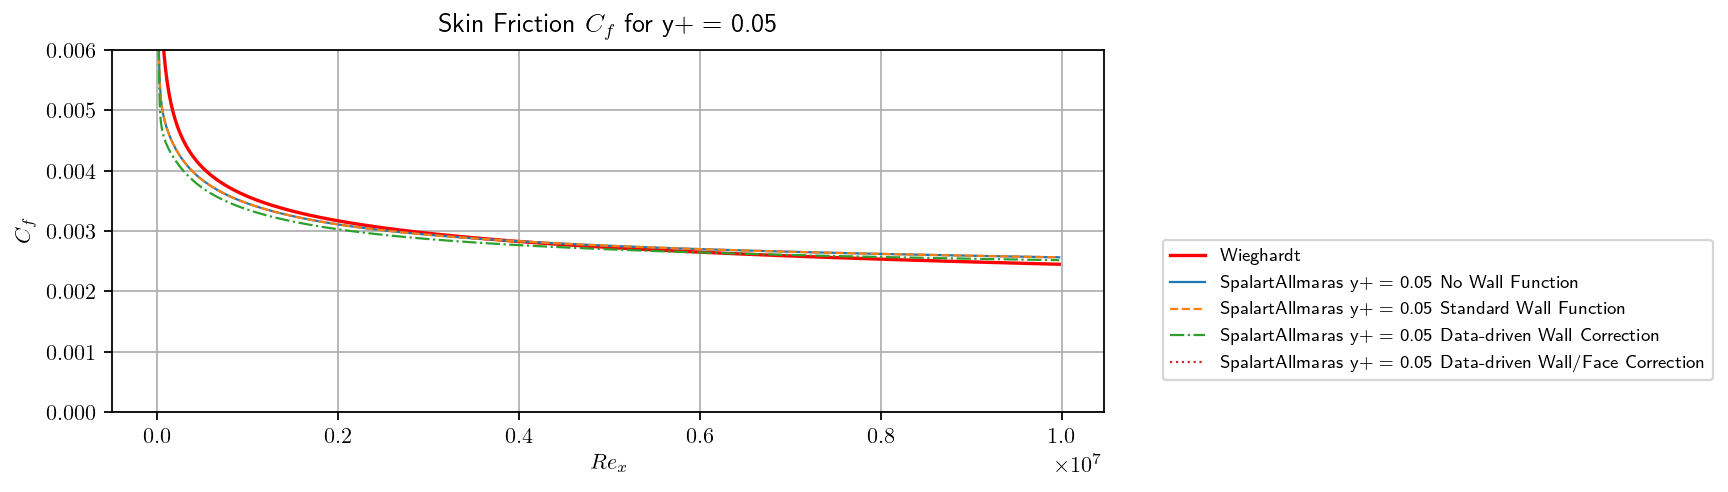

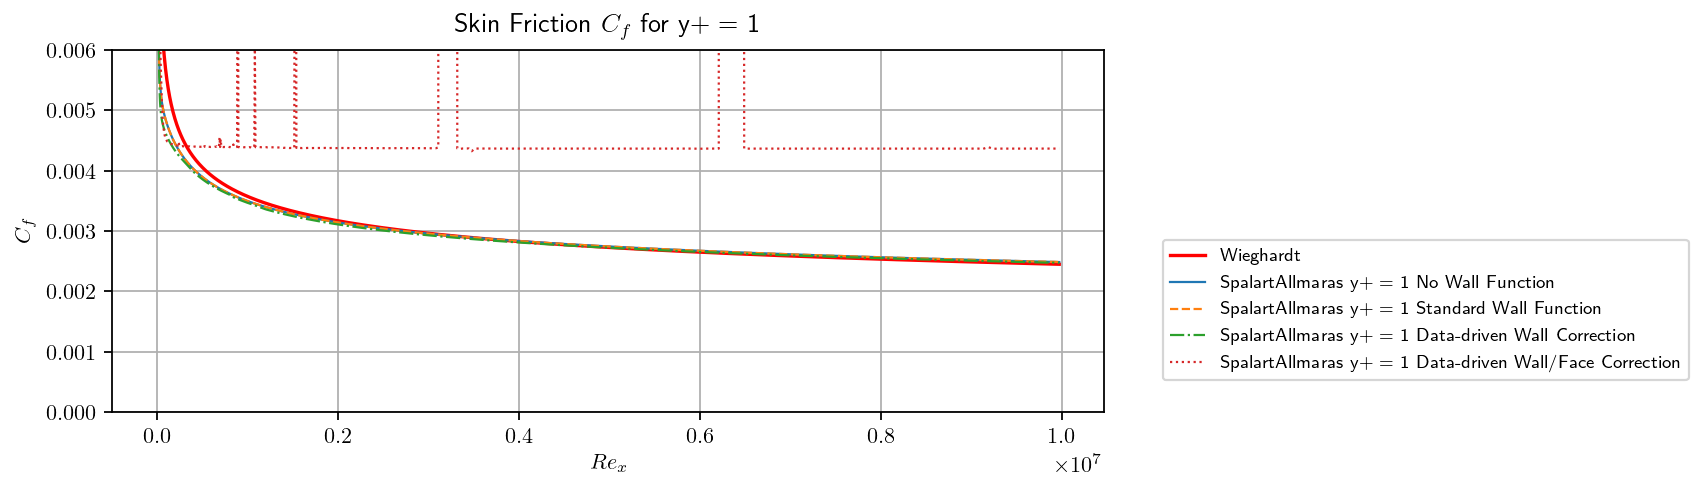

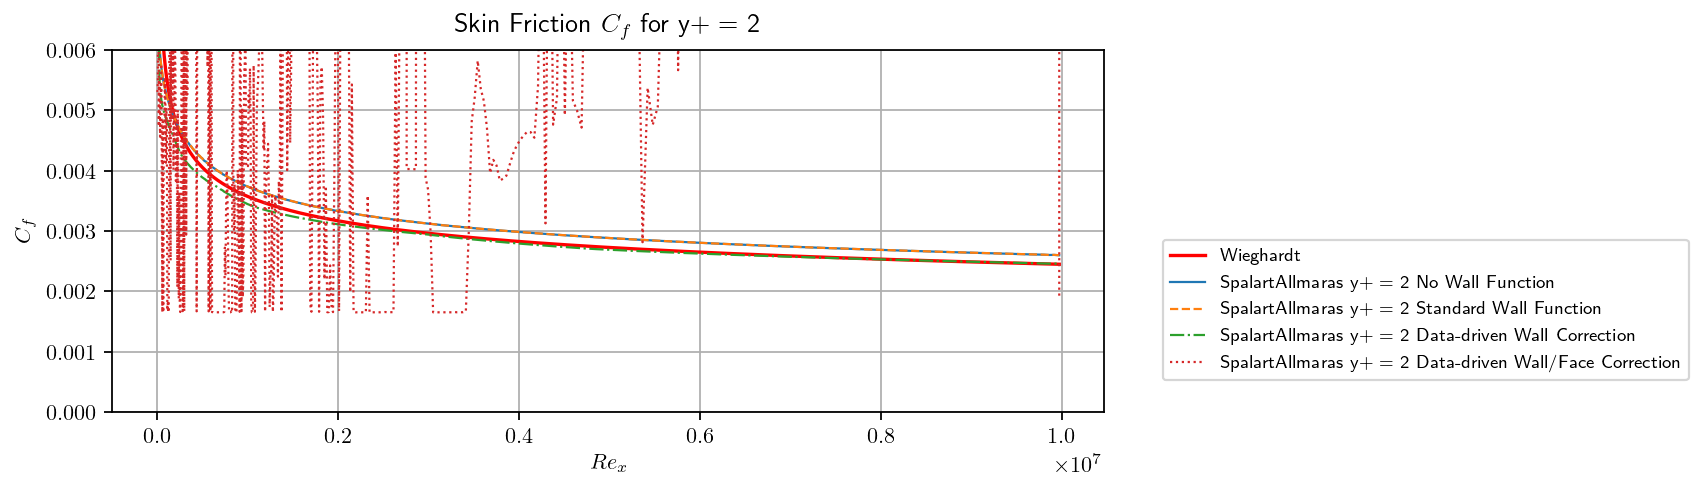

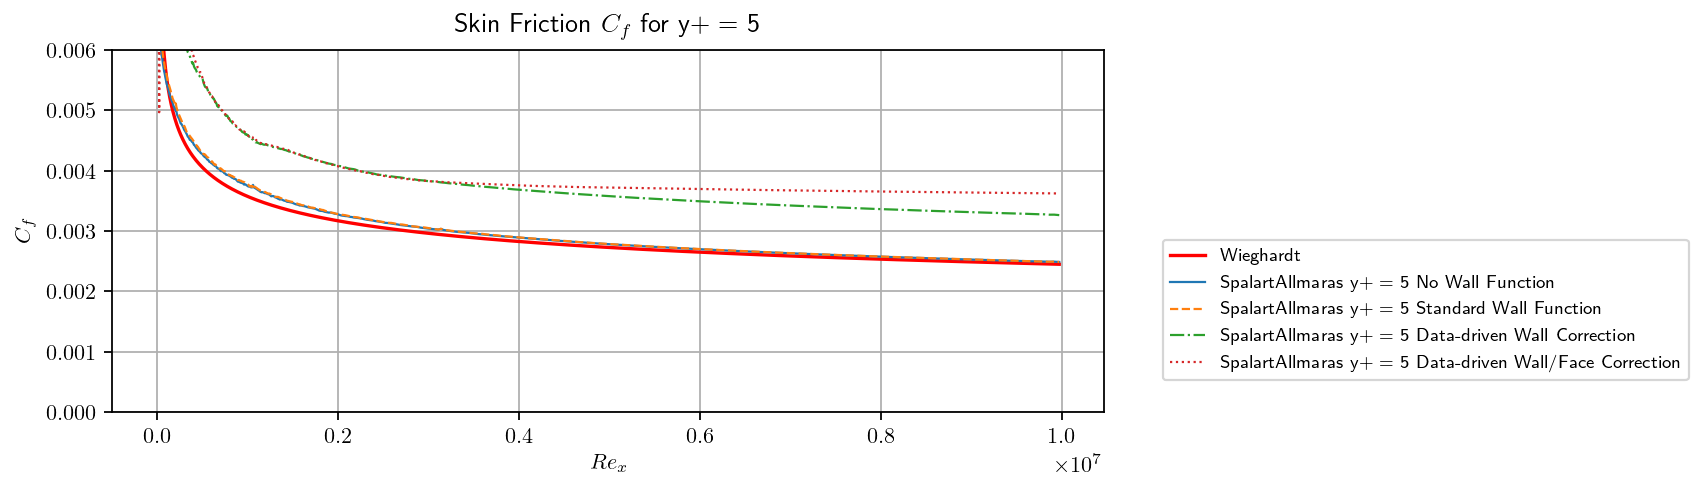

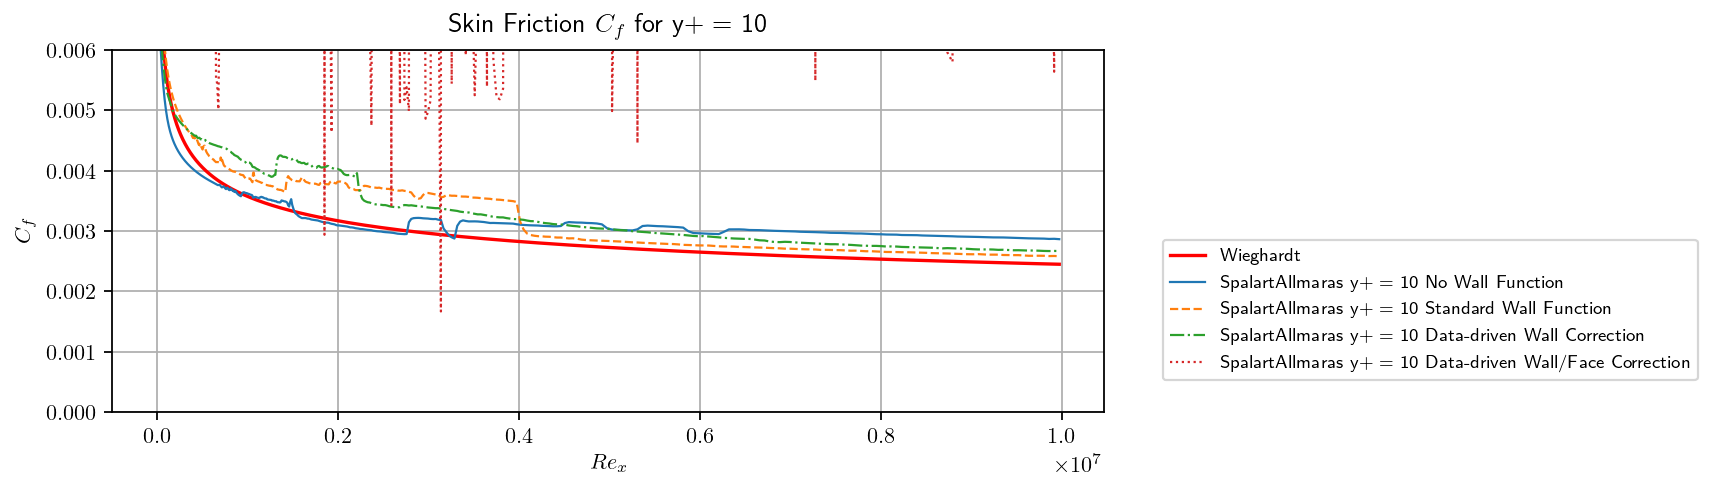

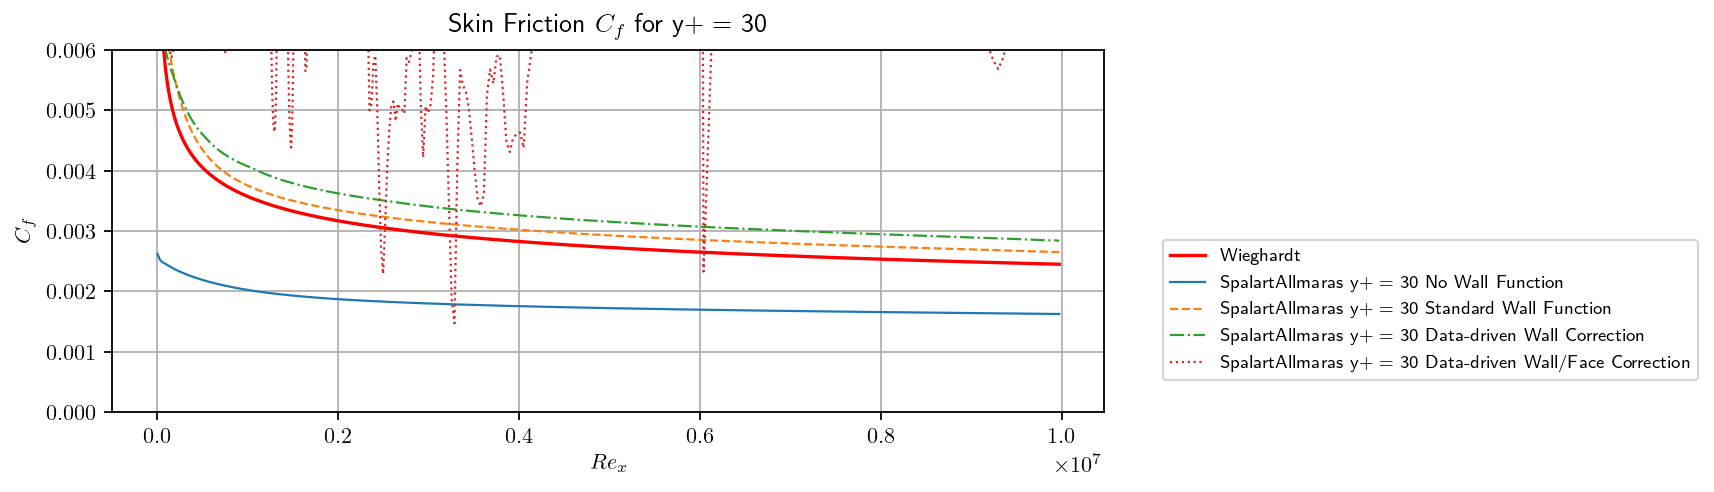

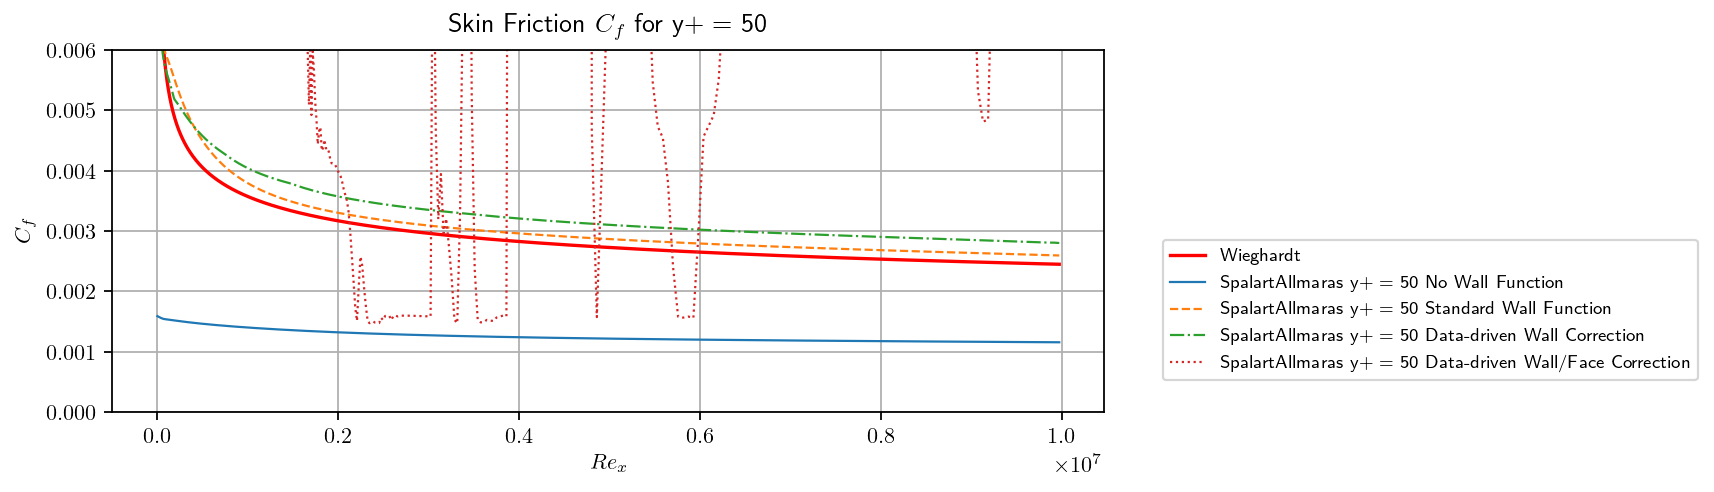

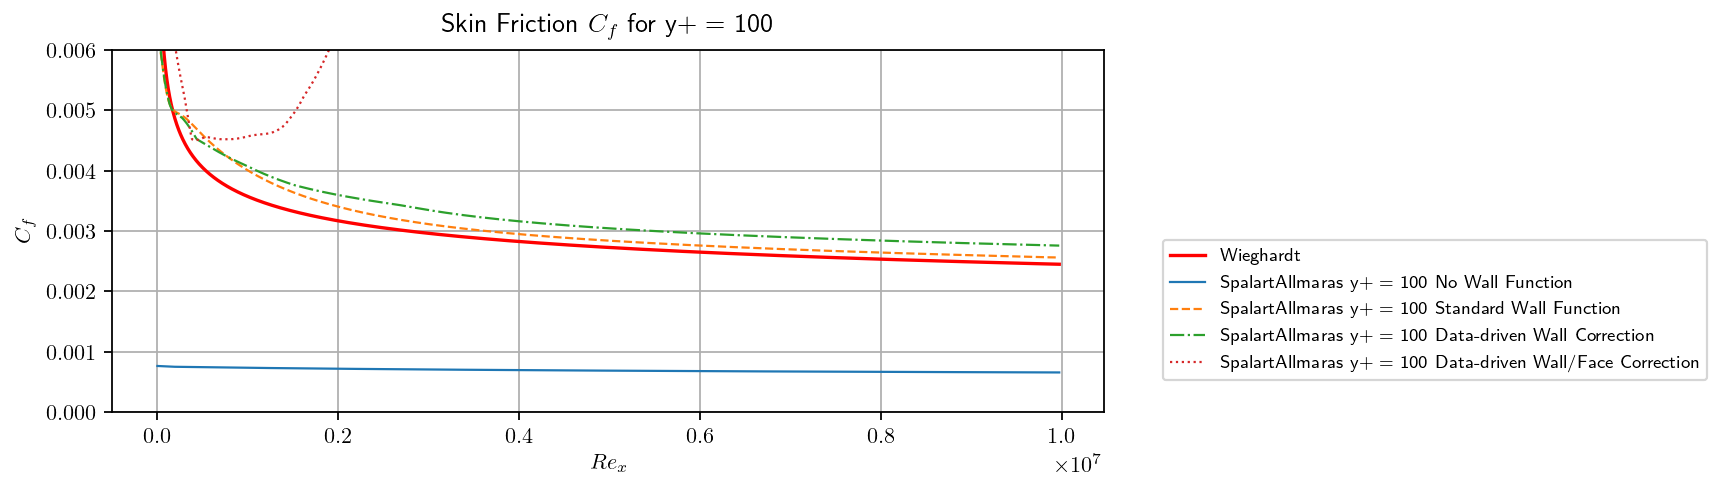

In [13]:
style = ["-", "--", "-.", ":"]
lw = 1.0
for j in range(len(yp)):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax.set_xlabel(r"$Re_x$")
    ax.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for y+ = {}".format(yp[j]))
    ax.plot(Rex, wieghardt, color = "r", label = "Wieghardt")    
    for i in range(len(res_list)):
        ax.plot(Rex, Cf_nowall[i + len(res_list)*j], label = "{} y+ = {} No Wall Function".format(model_sa, yp[j]), ls = style[i], c = "C{:d}".format(i), lw = lw)
        ax.plot(Rex, Cf_wall[i + len(res_list)*j], label = "{} y+ = {} Standard Wall Function".format(model_sa, yp[j]), ls = style[i+1], c = "C{:d}".format(i+1), lw = lw)
        ax.plot(Rex, Cf_ddwall[i + len(res_list)*j], label = "{} y+ = {} Data-driven Wall Correction".format(model_sa, yp[j]), ls = style[i+2], c = "C{:d}".format(i+2), lw = lw)
        ax.plot(Rex, Cf_ddface[i + len(res_list)*j], label = "{} y+ = {} Data-driven Wall/Face Correction".format(model_sa, yp[j]), ls = style[i+3], c = "C{:d}".format(i+3), lw = lw)
        ax.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.5))        

### Comparison *Cf* of data-driven wall function with the correction at the wall for different *y+*

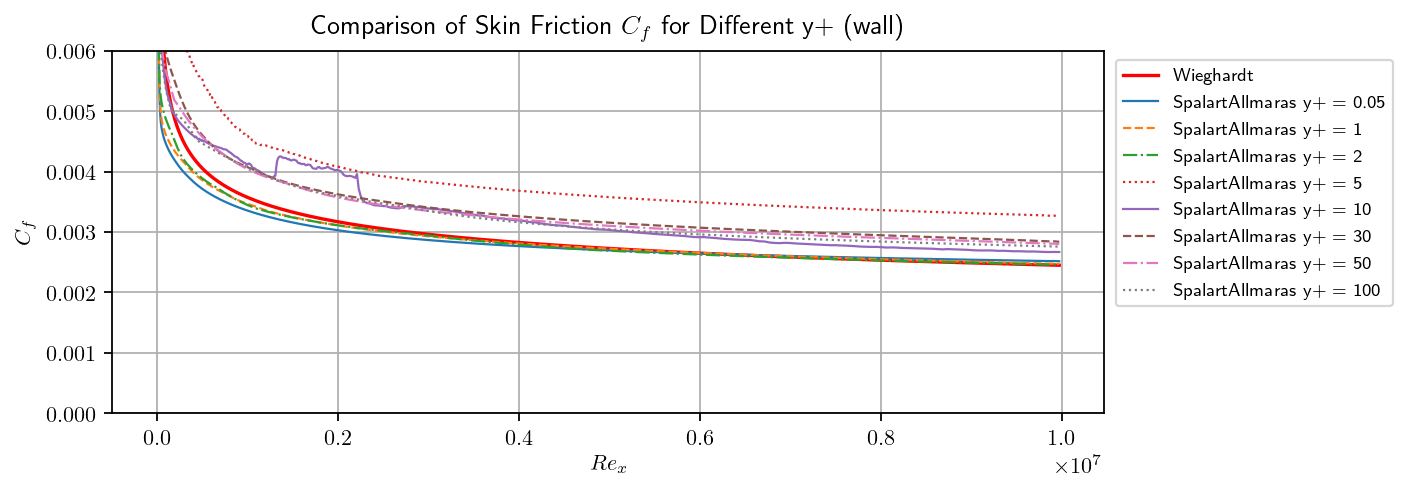

In [14]:
style2 = ["-", "--", "-.", ":"]
lw2 = 1.0
stylecycler = cycle(style2)

fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax2.set_xlabel(r"$Re_x$")
ax2.set_ylabel(r"$C_f$")
plt.title(r"Comparison of Skin Friction $C_f$ for Different y+ (wall)")
ax2.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax2.plot(Rex, Cf_ddwall[i + len(res_list)*j], label = "{} y+ = {}".format(model_sa, yp[j]), ls = next(stylecycler), c = "C{:d}".format(j), lw = lw2)
        ax2.legend(fontsize = 8, bbox_to_anchor=(1.3, 1))        

### Comparison *Cf* of data-driven wall function with the correction at the first face for different *y+*

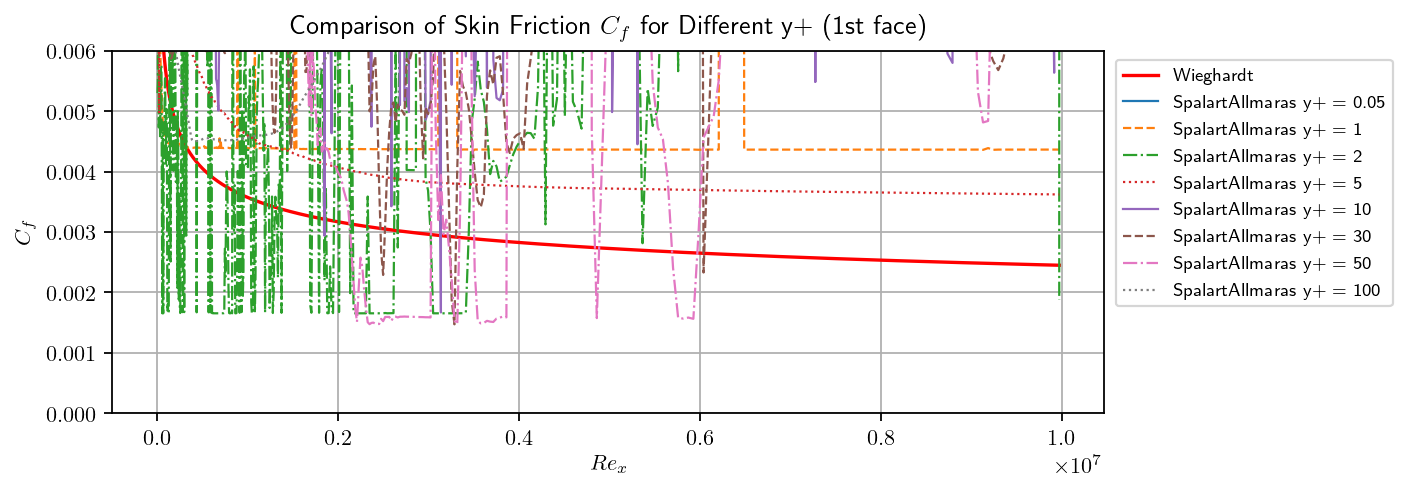

In [17]:
style3 = ["-", "--", "-.", ":"]
lw3 = 1.0
stylecycler2 = cycle(style3)

fig3, ax3 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax3.set_xlabel(r"$Re_x$")
ax3.set_ylabel(r"$C_f$")
plt.title(r"Comparison of Skin Friction $C_f$ for Different y+ (1st face)")
ax3.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax3.plot(Rex, Cf_ddface[i + len(res_list)*j], label = "{} y+ = {}".format(model_sa, yp[j]), ls = next(stylecycler2), c = "C{:d}".format(j), lw = lw3)
        ax3.legend(fontsize = 8, bbox_to_anchor=(1.3, 1))        